In [ ]:
## Notes from Mohammad:
## Clean up EDA for final github presentation. 
## Include important parts in easy to understand pictures

In [1]:
#Basic Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing training data, 555 from random state

fan_train = pd.read_csv('fan_train_555.csv', index_col=0)

#fan_test = pd.read_csv('DONTTOUCH_fan_test_555.csv')

In [4]:
fan_train.VL1r1.describe()

count    8289.000000
mean        0.364218
std         0.481239
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: VL1r1, dtype: float64

In [5]:
fan_test.VL1r1.describe()

count    2073.000000
mean        0.356006
std         0.478932
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: VL1r1, dtype: float64

In [5]:
## Removed S13s because they are captured by S12

features = ['S1', 'S2', 'D4', 'D5', 'D6', 
            'Hid_Ethnicity_Buckets', 'S12r3',
            'Fan_magnitude', 'VL2', 'Team6_magnitude']

In [3]:
## Quantitative features for certain models, e.g. knn
## From above, D5 and D6 could potentially be considered quantitative if
## Prefer not to say was zeroed out or respondants dropped.
cont_features = ['S2', 'D4', 'S12r3',
                'Fan_magnitude', 'VL2', 'Team6_magnitude']

In [18]:
## Keeper VL1s
## Ran test on all, and models did very well on 'lose' variables

VL1s = ['VL1r1','VL1r2','VL1r4','VL1r5',
       'VL1r7','VL1r10','VL1r11','VL1r12',
       'VL1r13','VL1r14']

In [7]:
## This was a check that distributions of VL1s in 
## train and test data sets were similar enough

for v in VL1s:
    print(fan_train[v].describe(), fan_test[v].describe())

count    8289.000000
mean        0.364218
std         0.481239
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: VL1r1, dtype: float64 count    2073.000000
mean        0.356006
std         0.478932
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: VL1r1, dtype: float64
count    8289.000000
mean        0.411630
std         0.492158
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: VL1r2, dtype: float64 count    2073.000000
mean        0.411963
std         0.492307
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: VL1r2, dtype: float64
count    8289.000000
mean        0.536374
std         0.498705
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: VL1r3, dtype: float64 count    2073.000000

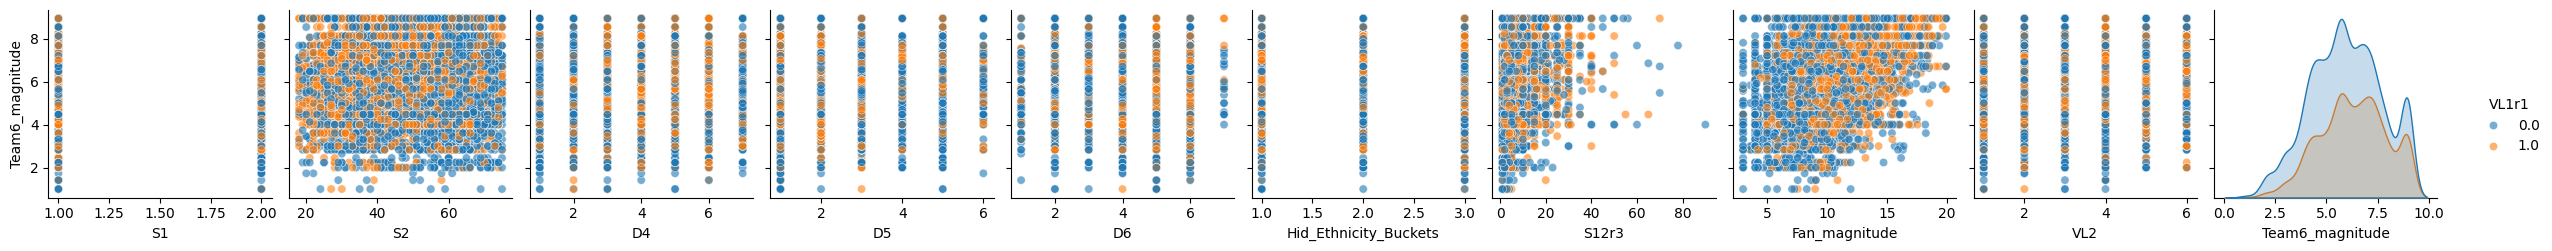

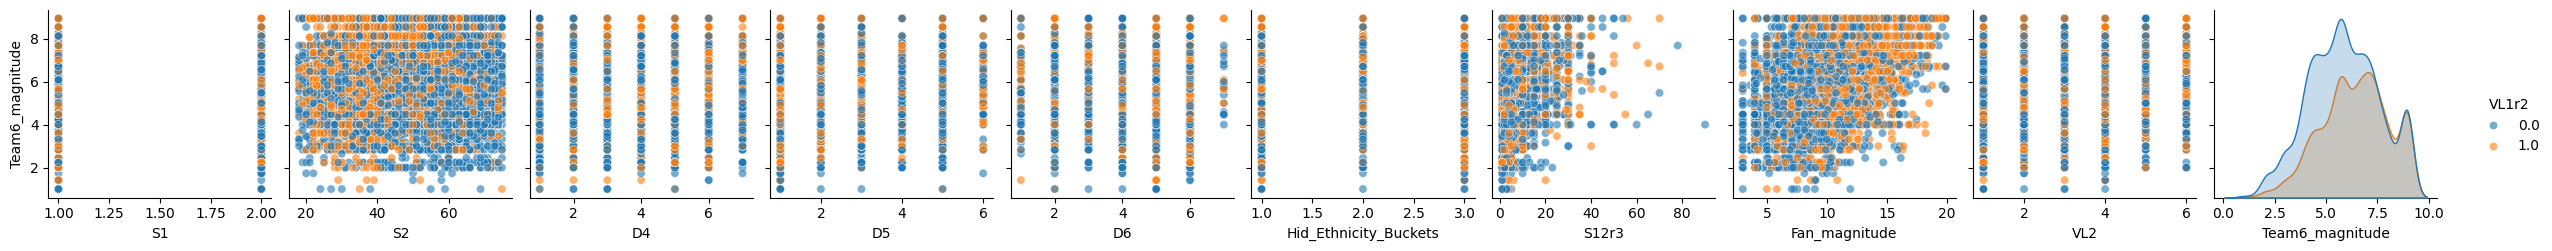

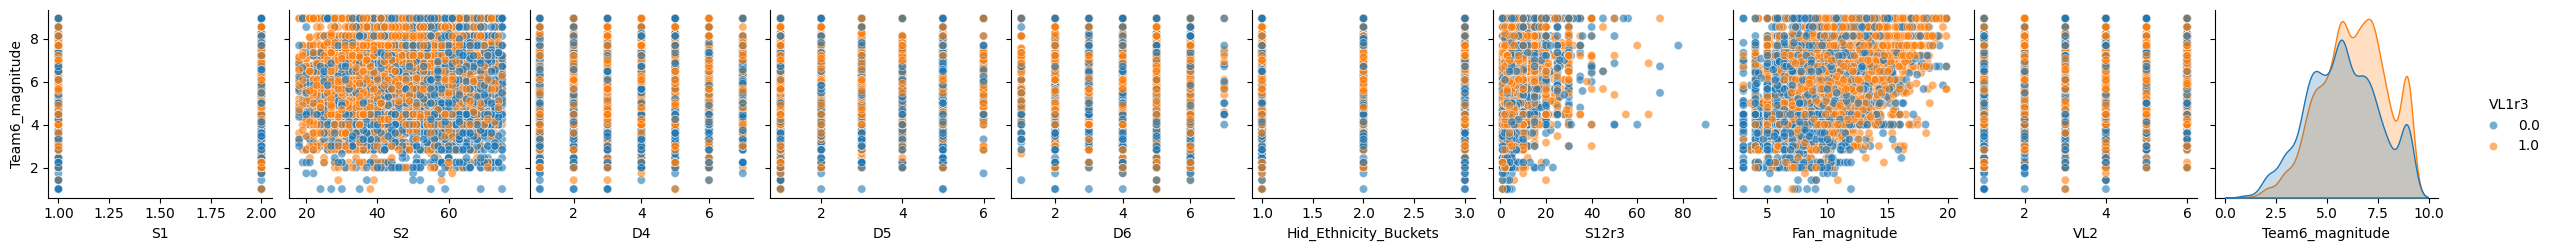

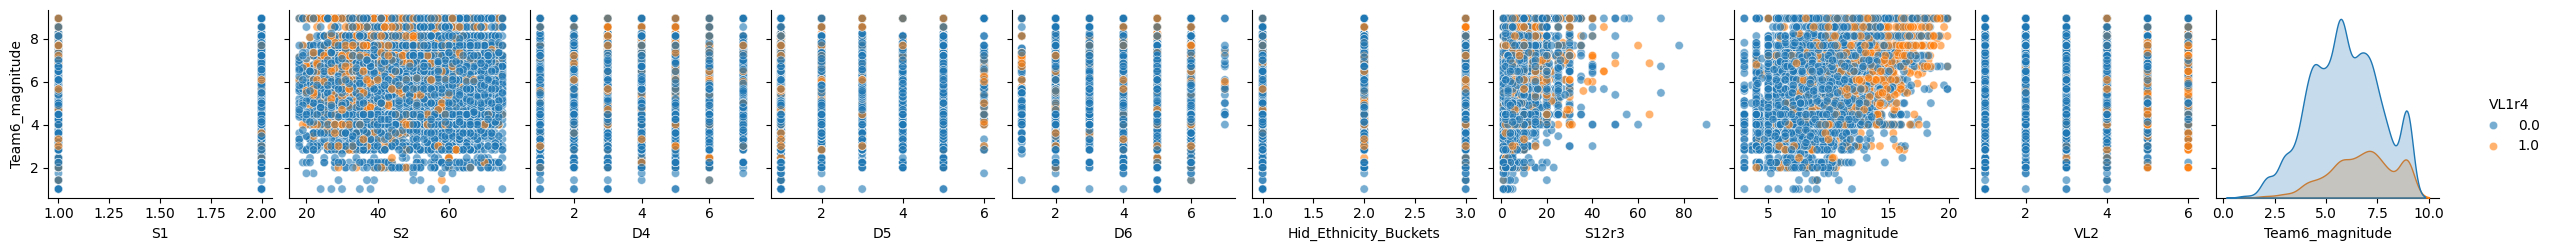

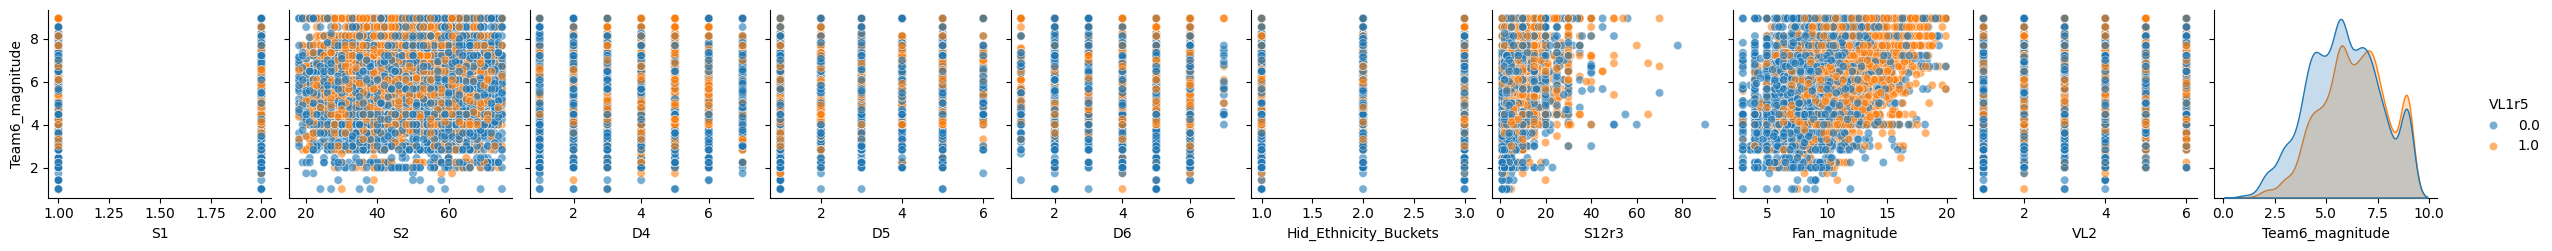

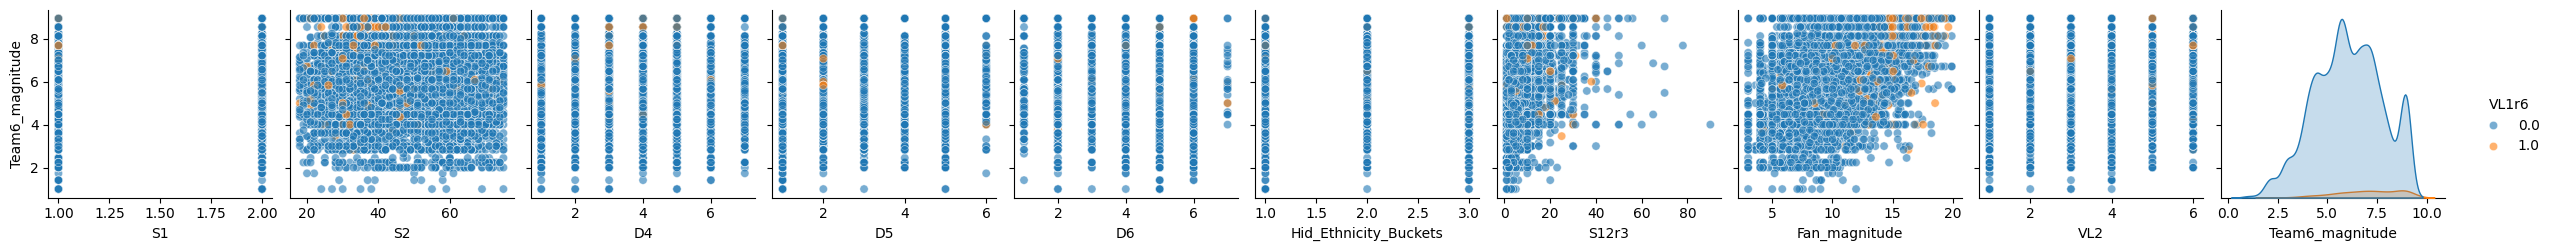

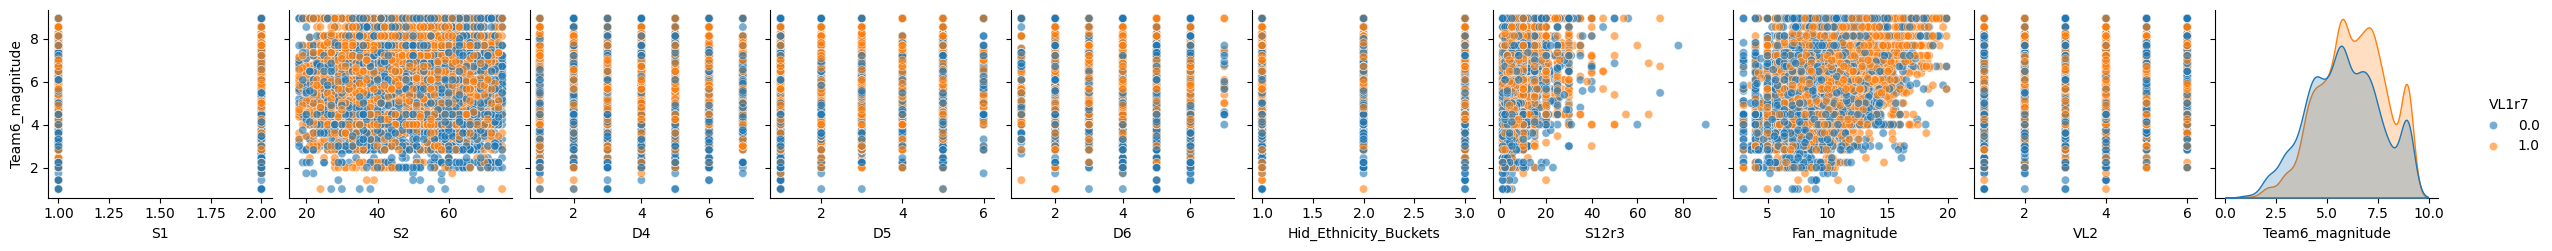

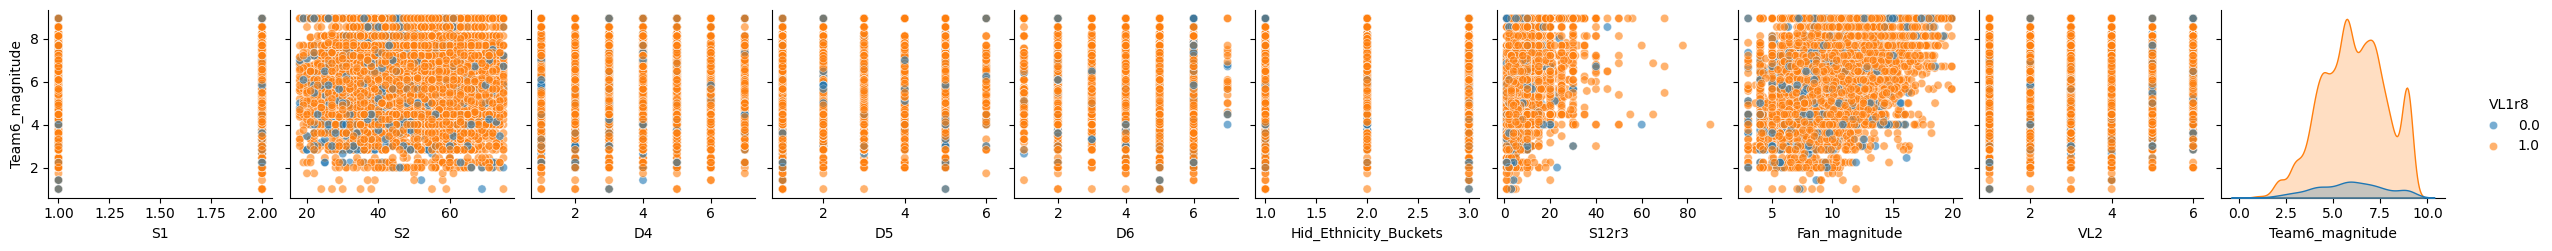

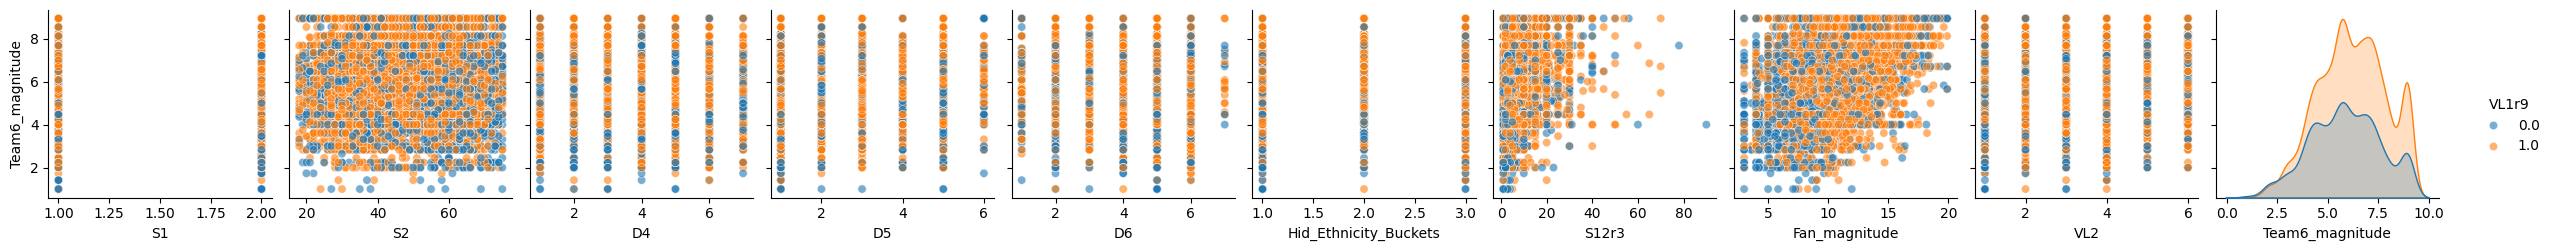

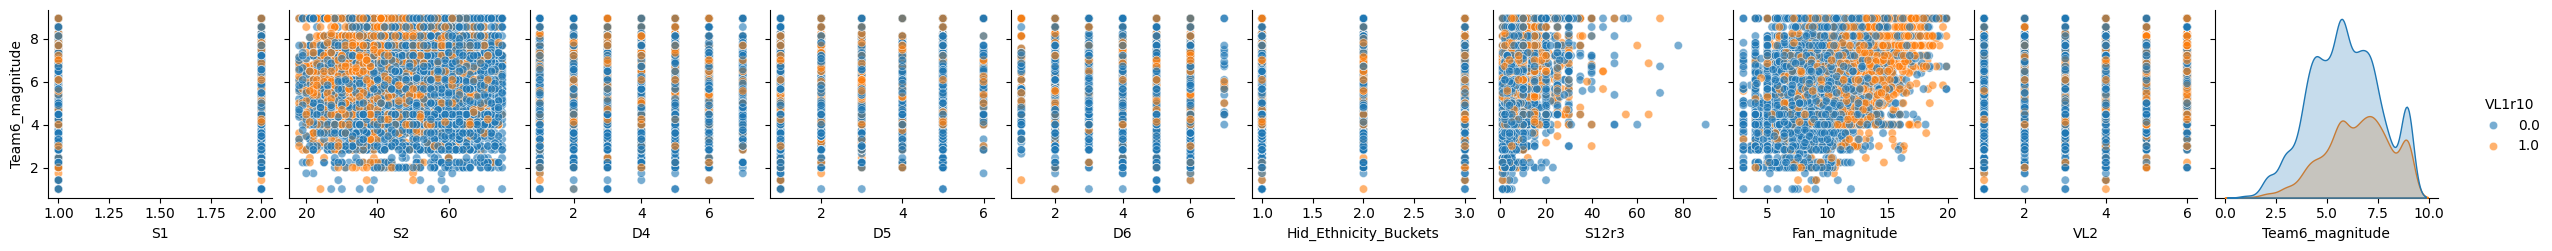

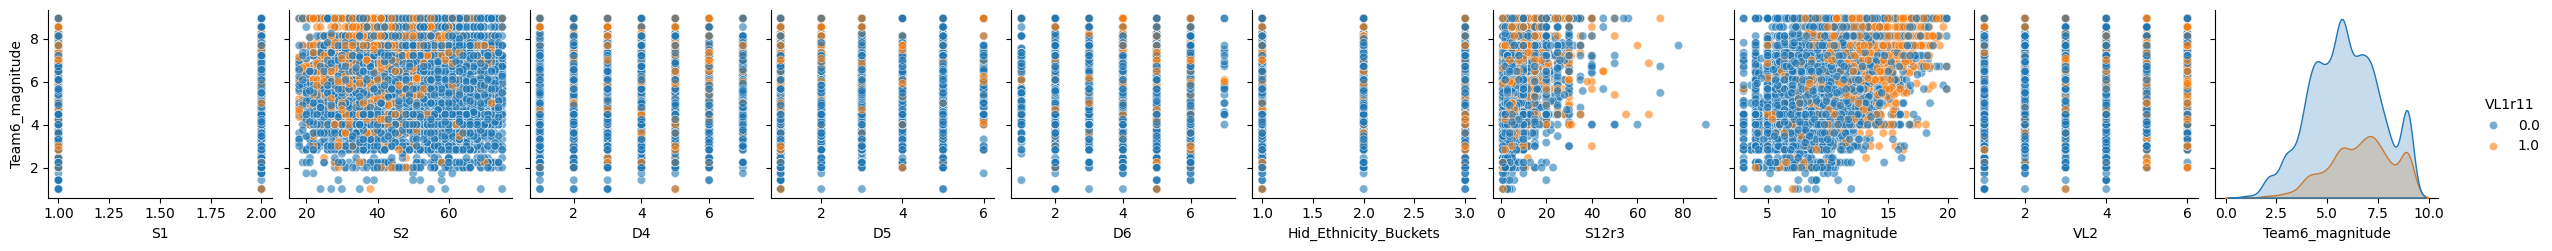

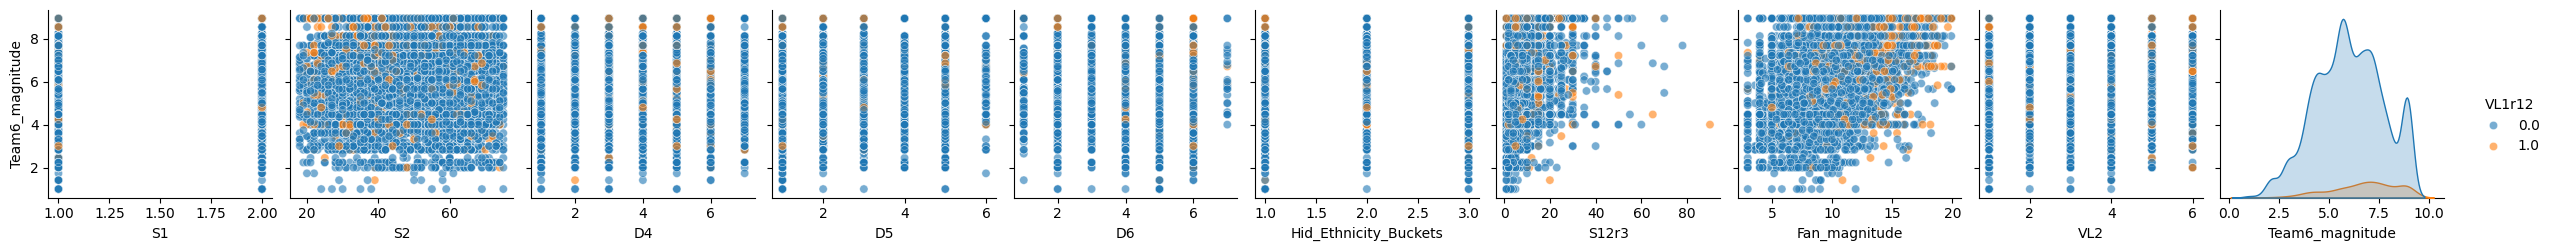

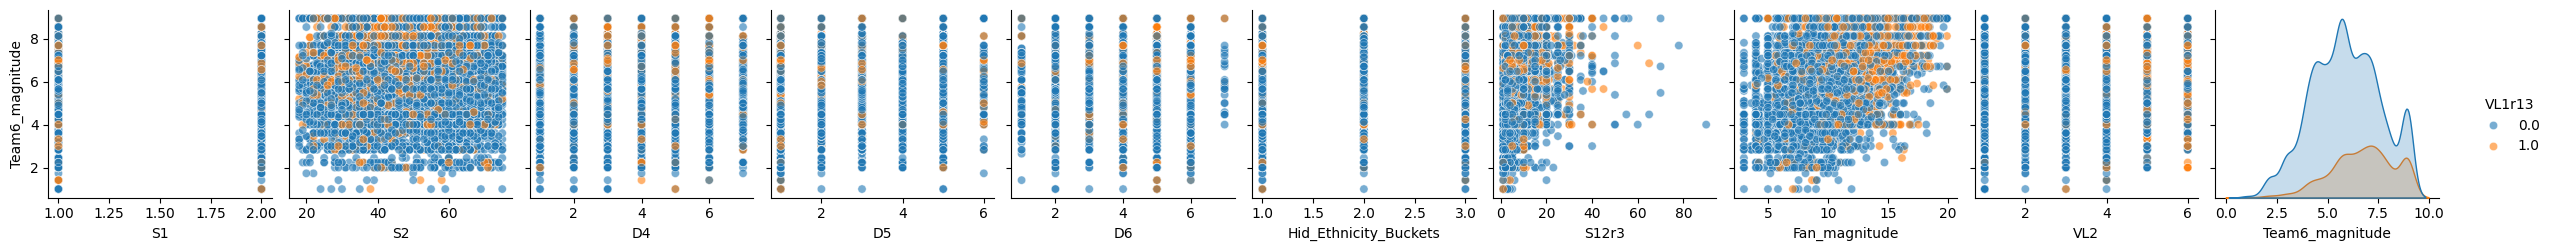

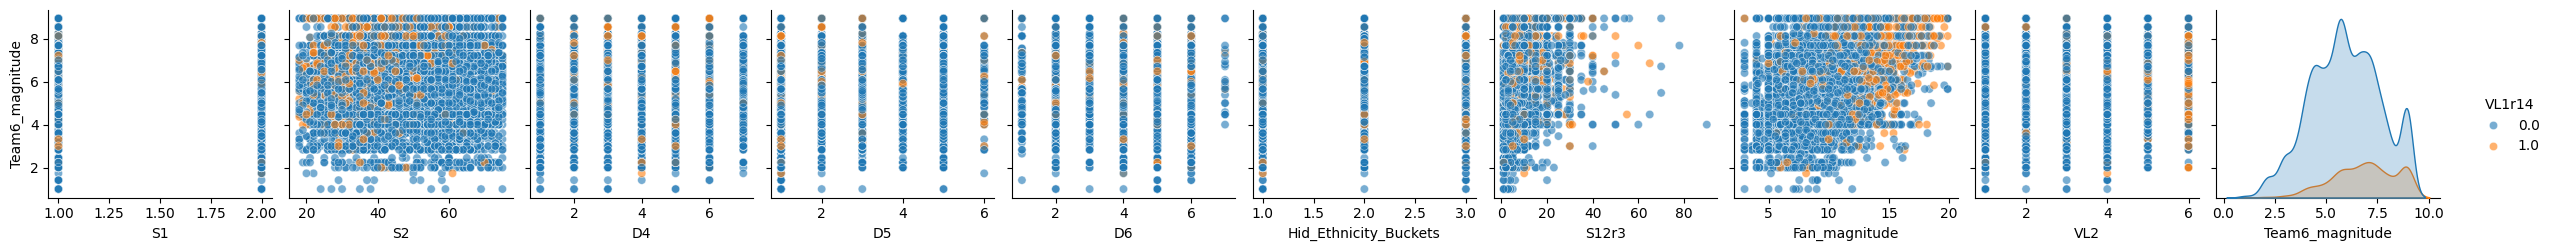

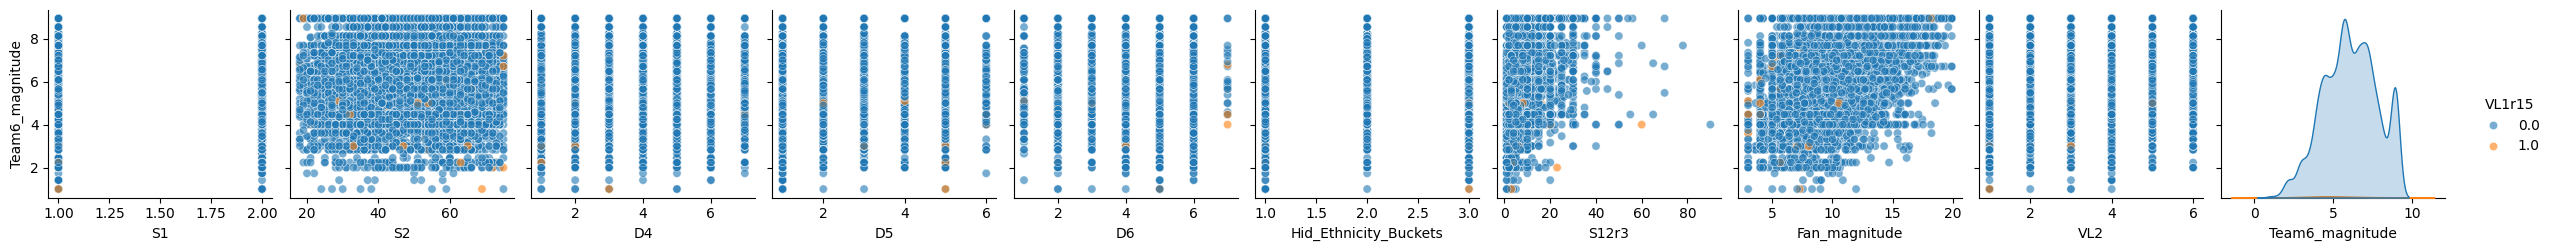

In [7]:
## Additional EDA for Team6_mag input.

for vls in VL1s:
    sns.pairplot(fan_train,
             x_vars = features,
             y_vars = 'Team6_magnitude',
             hue = vls,
             plot_kws = {'alpha' : .6})
    plt.show()

In [12]:
## Going to do Stratefied splits for Kfolds
## Checked above that original split has fairly equal
## Distributions of VL1s for training and test sets
from sklearn.model_selection import StratifiedKFold


from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score

## Importing classification models

# Models needing continuous inputs

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Tecnhnically, need feature independence for GNB, which we don't have.
# This means probabilities may be nonsense, but classification may still work...
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

## SVC for data that's linearly sep. Unlikely for us!
## Trying different kernels may help.
from sklearn.svm import SVC


In [13]:
## From Lecture 9 part V
classifiers = {
    # Putting linear decision boundary classifiers first
    #'lda' : LinearDiscriminantAnalysis(),
    'log_reg' : LogisticRegression(penalty=None, max_iter= 100000),
    #'svc_linear' : LinearSVC(dual = 'auto'),

    # Quadratic boundaries
    'qda' : QuadraticDiscriminantAnalysis(),
    'lda_poly' : Pipeline([('scale', StandardScaler()),('poly',PolynomialFeatures(2)),('lda', LinearDiscriminantAnalysis())]),
    'log_reg_poly' : Pipeline([('scale', StandardScaler()),('poly',PolynomialFeatures(2)),('log_reg', LogisticRegression(penalty=None, max_iter= 100000))]),
    'gnb' : GaussianNB(),

    # Complex boundaries
    'knn' : Pipeline([('scale', StandardScaler()),('knn', KNeighborsClassifier())]),   
    'svc_rbf' : Pipeline([('scale', StandardScaler()),('svc',SVC(kernel= 'rbf'))])
}

In [19]:
## Running through classifiers. Will do kfold split later on best ones.

X_train = fan_train[cont_features]

for v in VL1s:
    y_train = fan_train[v]
    for model_name, model in classifiers.items():
        model.fit(X_train,y_train)

        # We would rather use 'test' or holdout data here, but just running initial test
    accs = {model_name: accuracy_score(y_train, model.predict(X_train)) for model_name, model in classifiers.items()}

    print(v, accs)
#    accs

VL1r1 {'log_reg': 0.6554469779225479, 'qda': 0.6600313668717578, 'lda_poly': 0.6640125467487031, 'log_reg_poly': 0.6667873084811196, 'gnb': 0.6498974544577151, 'knn': 0.7544939075883701, 'svc_rbf': 0.6761973700084449}
VL1r2 {'log_reg': 0.6447098564362408, 'qda': 0.6460369163952225, 'lda_poly': 0.6536373507057546, 'log_reg_poly': 0.6531547834479431, 'gnb': 0.6448304982506937, 'knn': 0.7368802026782483, 'svc_rbf': 0.6624442031608155}
VL1r4 {'log_reg': 0.826637712631198, 'qda': 0.8162625165882494, 'lda_poly': 0.826637712631198, 'log_reg_poly': 0.8297743998069731, 'gnb': 0.8055253951019423, 'knn': 0.8641573169260466, 'svc_rbf': 0.8315840270237664}
VL1r5 {'log_reg': 0.6489323199420919, 'qda': 0.6502593799010737, 'lda_poly': 0.6609965013873809, 'log_reg_poly': 0.6608758595729279, 'gnb': 0.6462782000241284, 'knn': 0.7464109060200266, 'svc_rbf': 0.6731813246471227}
VL1r7 {'log_reg': 0.6026058631921825, 'qda': 0.6059838339968633, 'lda_poly': 0.6102062975027145, 'log_reg_poly': 0.610085655688261

In [ ]:
## knn with default neighbors of 5 performed best above by far. 
## Of course, we tested the model on the training data, 
## So all of the numbers appear better than they are...
## Will try ensemble models now with kfold split, and include knn

In [21]:
## Can handle mixed continuous and categorical, sticking with cont. for knn

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [22]:
ensemblers = {
    'knn' : Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())]),
    'rfc' : RandomForestClassifier(),
    'etc' : ExtraTreesClassifier(),
    'gbc' : GradientBoostingClassifier(),
    'ada' : AdaBoostClassifier(),
    'xgb' : XGBClassifier()
}

In [37]:
for i, j, in enumerate(ensemblers):
    print(i,j)
    #print(ensemblers[i[1]])

0 knn
1 rfc
2 etc
3 gbc
4 ada
5 xgb


In [44]:
kfold = StratifiedKFold(shuffle = True)

In [46]:
## X_train defined above, restricts to cont. features
## Here we are running 

accs = np.zeros((len(VL1s),len(ensemblers),5))

for j, v in enumerate(VL1s):

    y = fan_train[v]

    for i, (train_index, test_index) in enumerate(kfold.split(X_train, y)):

        X_tt = X_train.iloc[train_index]
        X_ho = X_train.iloc[test_index]
        y_tt = y.iloc[train_index]
        y_ho = y.iloc[test_index]

        for k, e in enumerate(ensemblers):

            model = ensemblers[e]
            model.fit(X_tt,y_tt)
            m_pred = model.predict(X_ho)

            accs[j,k,i] = accuracy_score(y_ho, m_pred)
            print((j,k,i))

(0, 0, 0)
(0, 1, 0)
(0, 2, 0)
(0, 3, 0)
(0, 4, 0)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(0, 5, 0)
(0, 0, 1)
(0, 1, 1)
(0, 2, 1)
(0, 3, 1)
(0, 4, 1)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(0, 5, 1)
(0, 0, 2)
(0, 1, 2)
(0, 2, 2)
(0, 3, 2)
(0, 4, 2)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(0, 5, 2)
(0, 0, 3)
(0, 1, 3)
(0, 2, 3)
(0, 3, 3)
(0, 4, 3)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(0, 5, 3)
(0, 0, 4)
(0, 1, 4)
(0, 2, 4)
(0, 3, 4)
(0, 4, 4)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(0, 5, 4)
(1, 0, 0)
(1, 1, 0)
(1, 2, 0)
(1, 3, 0)
(1, 4, 0)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(1, 5, 0)
(1, 0, 1)
(1, 1, 1)
(1, 2, 1)
(1, 3, 1)
(1, 4, 1)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(1, 5, 1)
(1, 0, 2)
(1, 1, 2)
(1, 2, 2)
(1, 3, 2)
(1, 4, 2)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(1, 5, 2)
(1, 0, 3)
(1, 1, 3)
(1, 2, 3)
(1, 3, 3)
(1, 4, 3)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(1, 5, 3)
(1, 0, 4)
(1, 1, 4)
(1, 2, 4)
(1, 3, 4)
(1, 4, 4)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(1, 5, 4)
(2, 0, 0)
(2, 1, 0)
(2, 2, 0)
(2, 3, 0)
(2, 4, 0)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(2, 5, 0)
(2, 0, 1)
(2, 1, 1)
(2, 2, 1)
(2, 3, 1)
(2, 4, 1)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(2, 5, 1)
(2, 0, 2)
(2, 1, 2)
(2, 2, 2)
(2, 3, 2)
(2, 4, 2)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(2, 5, 2)
(2, 0, 3)
(2, 1, 3)
(2, 2, 3)
(2, 3, 3)
(2, 4, 3)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(2, 5, 3)
(2, 0, 4)
(2, 1, 4)
(2, 2, 4)
(2, 3, 4)
(2, 4, 4)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(2, 5, 4)
(3, 0, 0)
(3, 1, 0)
(3, 2, 0)
(3, 3, 0)
(3, 4, 0)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(3, 5, 0)
(3, 0, 1)
(3, 1, 1)
(3, 2, 1)
(3, 3, 1)
(3, 4, 1)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(3, 5, 1)
(3, 0, 2)
(3, 1, 2)
(3, 2, 2)
(3, 3, 2)
(3, 4, 2)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(3, 5, 2)
(3, 0, 3)
(3, 1, 3)
(3, 2, 3)
(3, 3, 3)
(3, 4, 3)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(3, 5, 3)
(3, 0, 4)
(3, 1, 4)
(3, 2, 4)
(3, 3, 4)
(3, 4, 4)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(3, 5, 4)
(4, 0, 0)
(4, 1, 0)
(4, 2, 0)
(4, 3, 0)
(4, 4, 0)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(4, 5, 0)
(4, 0, 1)
(4, 1, 1)
(4, 2, 1)
(4, 3, 1)
(4, 4, 1)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(4, 5, 1)
(4, 0, 2)
(4, 1, 2)
(4, 2, 2)
(4, 3, 2)
(4, 4, 2)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(4, 5, 2)
(4, 0, 3)
(4, 1, 3)
(4, 2, 3)
(4, 3, 3)
(4, 4, 3)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(4, 5, 3)
(4, 0, 4)
(4, 1, 4)
(4, 2, 4)
(4, 3, 4)
(4, 4, 4)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(4, 5, 4)
(5, 0, 0)
(5, 1, 0)
(5, 2, 0)
(5, 3, 0)
(5, 4, 0)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(5, 5, 0)
(5, 0, 1)
(5, 1, 1)
(5, 2, 1)
(5, 3, 1)
(5, 4, 1)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(5, 5, 1)
(5, 0, 2)
(5, 1, 2)
(5, 2, 2)
(5, 3, 2)
(5, 4, 2)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(5, 5, 2)
(5, 0, 3)
(5, 1, 3)
(5, 2, 3)
(5, 3, 3)
(5, 4, 3)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(5, 5, 3)
(5, 0, 4)
(5, 1, 4)
(5, 2, 4)
(5, 3, 4)
(5, 4, 4)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(5, 5, 4)
(6, 0, 0)
(6, 1, 0)
(6, 2, 0)
(6, 3, 0)
(6, 4, 0)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(6, 5, 0)
(6, 0, 1)
(6, 1, 1)
(6, 2, 1)
(6, 3, 1)
(6, 4, 1)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(6, 5, 1)
(6, 0, 2)
(6, 1, 2)
(6, 2, 2)
(6, 3, 2)
(6, 4, 2)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(6, 5, 2)
(6, 0, 3)
(6, 1, 3)
(6, 2, 3)
(6, 3, 3)
(6, 4, 3)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(6, 5, 3)
(6, 0, 4)
(6, 1, 4)
(6, 2, 4)
(6, 3, 4)
(6, 4, 4)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(6, 5, 4)
(7, 0, 0)
(7, 1, 0)
(7, 2, 0)
(7, 3, 0)
(7, 4, 0)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(7, 5, 0)
(7, 0, 1)
(7, 1, 1)
(7, 2, 1)
(7, 3, 1)
(7, 4, 1)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(7, 5, 1)
(7, 0, 2)
(7, 1, 2)
(7, 2, 2)
(7, 3, 2)
(7, 4, 2)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(7, 5, 2)
(7, 0, 3)
(7, 1, 3)
(7, 2, 3)
(7, 3, 3)
(7, 4, 3)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(7, 5, 3)
(7, 0, 4)
(7, 1, 4)
(7, 2, 4)
(7, 3, 4)
(7, 4, 4)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(7, 5, 4)
(8, 0, 0)
(8, 1, 0)
(8, 2, 0)
(8, 3, 0)
(8, 4, 0)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(8, 5, 0)
(8, 0, 1)
(8, 1, 1)
(8, 2, 1)
(8, 3, 1)
(8, 4, 1)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(8, 5, 1)
(8, 0, 2)
(8, 1, 2)
(8, 2, 2)
(8, 3, 2)
(8, 4, 2)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(8, 5, 2)
(8, 0, 3)
(8, 1, 3)
(8, 2, 3)
(8, 3, 3)
(8, 4, 3)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(8, 5, 3)
(8, 0, 4)
(8, 1, 4)
(8, 2, 4)
(8, 3, 4)
(8, 4, 4)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(8, 5, 4)
(9, 0, 0)
(9, 1, 0)
(9, 2, 0)
(9, 3, 0)
(9, 4, 0)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(9, 5, 0)
(9, 0, 1)
(9, 1, 1)
(9, 2, 1)
(9, 3, 1)
(9, 4, 1)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(9, 5, 1)
(9, 0, 2)
(9, 1, 2)
(9, 2, 2)
(9, 3, 2)
(9, 4, 2)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(9, 5, 2)
(9, 0, 3)
(9, 1, 3)
(9, 2, 3)
(9, 3, 3)
(9, 4, 3)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(9, 5, 3)
(9, 0, 4)
(9, 1, 4)
(9, 2, 4)
(9, 3, 4)
(9, 4, 4)


C:\Users\uglyr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(9, 5, 4)


In [47]:
## Each line of the output represents an output variable from VL1s 
## We see the mean accuracy scores by model from ensemblers
## Adaboost and gradientboost both outperformed xgb for all v in VL1
## Unsurprisingly, we did well on VL1s about betting as VL2 was included in inputs
## We also did well on buying multi-game tickets 'VL1r12'.


accs.mean(axis = 2)

array([[0.62094328, 0.64591735, 0.63855704, 0.66292674, 0.66147943,
        0.6421763 ],
       [0.59826244, 0.63264463, 0.6325251 , 0.64736364, 0.64651808,
        0.6261312 ],
       [0.80069843, 0.81565919, 0.81638303, 0.82482745, 0.82506943,
        0.81071289],
       [0.61298043, 0.64157214, 0.63324668, 0.65677322, 0.6523095 ,
        0.62818048],
       [0.54421648, 0.56520635, 0.56267369, 0.59874568, 0.60453615,
        0.56858442],
       [0.69501839, 0.71806017, 0.70913251, 0.73169141, 0.73265708,
        0.70382389],
       [0.74773869, 0.76450814, 0.75919996, 0.78079471, 0.77645148,
        0.7610082 ],
       [0.91144838, 0.91687741, 0.91555029, 0.91784264, 0.91820423,
        0.908794  ],
       [0.75751008, 0.77367523, 0.77150518, 0.78007139, 0.78477607,
        0.76704131],
       [0.82989372, 0.83918333, 0.83459869, 0.8488346 , 0.84787053,
        0.83363411]])

In [43]:
## Feature importances for the last model tested 'VL1r14' (played daily fantasy)
## VL2 was most important feature for predicting this by far.
model.feature_importances_

array([0.09509153, 0.08432989, 0.07898922, 0.09306782, 0.56992036,
       0.0786012 ], dtype=float32)